In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/RedWineQuality/winequality-red.csv', encoding='utf-8')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [105]:
df['Gender'] = df['Gender'].apply(lambda x:1 if x == 'Male' else 0)

In [5]:
df.to_csv('data/LogisticRegression/Social_Network_Ads_label_encoded.csv',index=None)

In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
X = df.drop(['quality'], axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(1279, 11)
(320, 11)


In [6]:
models = [linear_model.LogisticRegression(),
          neighbors.KNeighborsClassifier(),
          svm.SVC(),
          naive_bayes.GaussianNB(),
          tree.DecisionTreeClassifier(max_depth=3),
          ensemble.RandomForestClassifier(max_depth=3),
          ensemble.GradientBoostingClassifier(n_estimators=100)]

In [13]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred, average='micro')
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred, average='micro')
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred, average='micro')
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred, average='micro')
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred, average='micro')
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred, average='micro')
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp


C:\Users\ishih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.587177,0.587177,0.587177,0.587177,0.559375,0.559375,0.559375,0.559375
1,KNeighborsClassifier,0.666927,0.666927,0.666927,0.666927,0.496875,0.496875,0.496875,0.496875
2,SVC,0.510555,0.510555,0.510555,0.510555,0.481250,0.481250,0.481250,0.481250
3,GaussianNB,0.565285,0.565285,0.565285,0.565285,0.531250,0.531250,0.531250,0.531250
4,DecisionTreeClassifier,0.593432,0.593432,0.593432,0.593432,0.518750,0.518750,0.518750,0.518750
5,RandomForestClassifier,0.620016,0.620016,0.620016,0.620016,0.553125,0.553125,0.553125,0.553125
6,GradientBoostingClassifier,0.892103,0.892103,0.892103,0.892103,0.618750,0.618750,0.618750,0.618750


In [14]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [15]:
from sklearn.preprocessing import StandardScaler

scaling_columns = X_train.columns
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [16]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred, average='micro')
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred, average='micro')
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred, average='micro')
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred, average='micro')
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred, average='micro')
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred, average='micro')
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.602033,0.602033,0.602033,0.602033,0.584375,0.584375,0.584375,0.584375
1,KNeighborsClassifier,0.698984,0.698984,0.698984,0.698984,0.575000,0.575000,0.575000,0.575000
2,SVC,0.672400,0.672400,0.672400,0.672400,0.603125,0.603125,0.603125,0.603125
3,GaussianNB,0.573104,0.573104,0.573104,0.573104,0.528125,0.528125,0.528125,0.528125
4,DecisionTreeClassifier,0.593432,0.593432,0.593432,0.593432,0.518750,0.518750,0.518750,0.518750
5,RandomForestClassifier,0.622361,0.622361,0.622361,0.622361,0.556250,0.556250,0.556250,0.556250
6,GradientBoostingClassifier,0.892103,0.892103,0.892103,0.892103,0.625000,0.625000,0.625000,0.625000


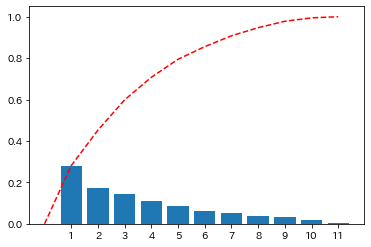

In [18]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio, color='red', linestyle='dashed')
plt.xticks(range(1, X_train.shape[-1]+1))
plt.show()

In [19]:
n = 7
columns=[f'PC{i+1}' for i in range(n)]
X_train_pca = pd.DataFrame(X_train_pca[:,:n], columns=columns)
X_test_pca = pd.DataFrame(X_test_pca[:,:n], columns=columns)

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


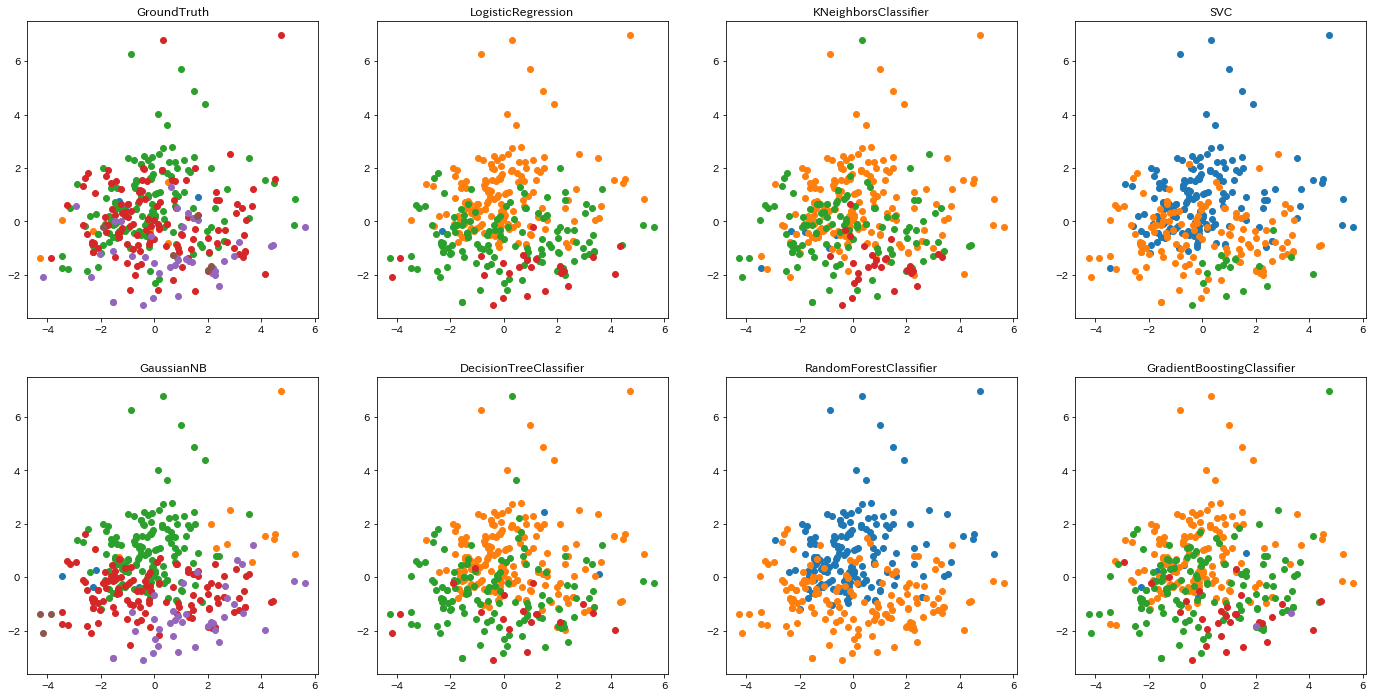

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.602033,0.602033,0.602033,0.602033,0.584375,0.584375,0.584375,0.584375
1,KNeighborsClassifier,0.698984,0.698984,0.698984,0.698984,0.575000,0.575000,0.575000,0.575000
2,SVC,0.672400,0.672400,0.672400,0.672400,0.603125,0.603125,0.603125,0.603125
3,GaussianNB,0.573104,0.573104,0.573104,0.573104,0.528125,0.528125,0.528125,0.528125
4,DecisionTreeClassifier,0.593432,0.593432,0.593432,0.593432,0.518750,0.518750,0.518750,0.518750
5,RandomForestClassifier,0.616888,0.616888,0.616888,0.616888,0.556250,0.556250,0.556250,0.556250
6,GradientBoostingClassifier,0.892103,0.892103,0.892103,0.892103,0.618750,0.618750,0.618750,0.618750


In [20]:
df_model_comp = pd.DataFrame()

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(24.0,12.0))
ax = ax.flatten()
for j in np.unique(y_test):
    X_tmp = X_test_pca[y_test.values == j]
    ax[0].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
ax[0].set_title('GroundTruth')

for i, model in enumerate(models):
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred, average='micro')
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred, average='micro')
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred, average='micro')
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred, average='micro')
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred, average='micro')
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred, average='micro')
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
    for j in np.unique(y_pred):
        X_tmp = X_test_pca[y_pred == j]
        ax[i+1].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
    ax[i+1].set_title(model.__class__.__name__)
plt.show()

df_model_comp